<a href="https://colab.research.google.com/github/Rice-from-data/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Ned_Horsey_LS_DS_142_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 142
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [50]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [51]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=36.67081161106961, pvalue=1.0890164379983385e-08)


In [52]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## Live Lecture - let's explore some more of scipy.stats

Candidate topics to explore:

- `scipy.stats.chi2` - the Chi-squared distribution, which we can use to reproduce the Chi-squared test
- Calculate the Chi-Squared test statistic "by hand" (with code), and feed it into `chi2`
- Build a confidence interval with `stats.t.ppf`, the t-distribution percentile point function (the inverse of the CDF) - we can write a function to return a tuple of `(mean, lower bound, upper bound)` that you can then use for the assignment (visualizing confidence intervals)

In [53]:
# playing with distributions
from scipy.stats import chi2

chi2_5 = chi2(5)
chi2

In [54]:
chi2_5.mean()

5.0

In [55]:
chi2_5.median()

4.351460191095526

In [56]:
chi2_500 = chi2(500)
print(chi2_500.mean())
print(chi2_500.median())

500.0
499.3334915888738


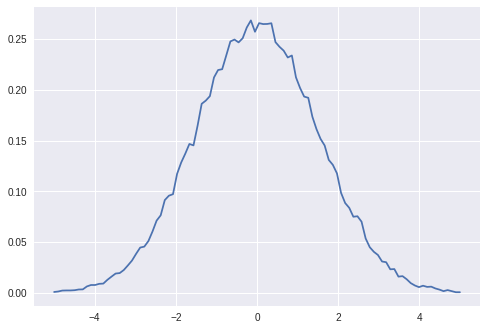

In [57]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

data = scipy.stats.norm.rvs(size=100000, loc=0, scale=1.5, random_state =123)

# drawing a lot of random normals 

X = np.linspace(-5, 5, 100)
hist = np.histogram(data, bins = 150)
# bins 100x so it looks like a density plot, but too many bins will show off the randomness of the distribution

hist_dist = scipy.stats.rv_histogram(hist)
plt.plot(X, hist_dist.pdf(X), label='PDF');

In [58]:
# let's see if a chi500 is normal
from scipy.stats import normaltest
normaltest(chi2_500.rvs(100000))
# pvalue is high means that we have to reject the null hypoth which is that this comes from a normal dist - which is true, it's a chi2 dist

NormaltestResult(statistic=329.68899472435425, pvalue=2.564155881415153e-72)

In [59]:
chisquare(chi2_500.rvs(10000))

Power_divergenceResult(statistic=20432.144672220835, pvalue=0.0)

In [60]:
chisquare(chi2_5.rvs(100))

Power_divergenceResult(statistic=194.70412727096567, pvalue=3.226372768027346e-08)

In [61]:
help(chisquare)

Help on function chisquare in module scipy.stats.stats:

chisquare(f_obs, f_exp=None, ddof=0, axis=0)
    Calculate a one-way chi square test.
    
    The chi square test tests the null hypothesis that the categorical data
    has the given frequencies.
    
    Parameters
    ----------
    f_obs : array_like
        Observed frequencies in each category.
    f_exp : array_like, optional
        Expected frequencies in each category.  By default the categories are
        assumed to be equally likely.
    ddof : int, optional
        "Delta degrees of freedom": adjustment to the degrees of freedom
        for the p-value.  The p-value is computed using a chi-squared
        distribution with ``k - 1 - ddof`` degrees of freedom, where `k`
        is the number of observed frequencies.  The default value of `ddof`
        is 0.
    axis : int or None, optional
        The axis of the broadcast result of `f_obs` and `f_exp` along which to
        apply the test.  If axis is None, all va

In [62]:
help(normaltest)

Help on function normaltest in module scipy.stats.stats:

normaltest(a, axis=0, nan_policy='propagate')
    Test whether a sample differs from a normal distribution.
    
    This function tests the null hypothesis that a sample comes
    from a normal distribution.  It is based on D'Agostino and
    Pearson's [1]_, [2]_ test that combines skew and kurtosis to
    produce an omnibus test of normality.
    
    
    Parameters
    ----------
    a : array_like
        The array containing the sample to be tested.
    axis : int or None, optional
        Axis along which to compute test. Default is 0. If None,
        compute over the whole array `a`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan. 'propagate' returns nan,
        'raise' throws an error, 'omit' performs the calculations ignoring nan
        values. Default is 'propagate'.
    
    Returns
    -------
    statistic : float or array
        ``s^2 + k^2``, wh

In [63]:
# calculate chi squared test stat by hand

# 1 male wants t oeat outside, 2 insite
# 2 females want houtside, 1 inside

chi_data = [[1,2], [2,1]]
import pandas as pd
chi_data= pd.DataFrame(chi_data, columns = ['Outside', 'Inside'], index = ['Male', 'Female'])
chi_data

,Outside,Inside
Male,1,2
Female,2,1


In [64]:
# chi data looks at the margins???
# typout / expalin margins
# Total # of males (first row) = 3
# Total # of femails (2nrd row) =3
# Total number of ppl outside = 3
# Total number of ppl prefer inside = 3

# Now lets think about margin *proportions*
# % of males? = 50%
# % of feamles = 50%
# ...everything = .5
# expected value of top left cell (males who want to eat outside) = (.5 (proportion of males) * .5 (proportion of outside eaters) * 6) = 1.5
# actual value is 1

# Because of symetry of this example, we know the expected value of all cells is 1.5 b/c margins are all the same

# chi-squared test statistic is the sum of square deviation from these E.V.
chi_data = [[1,2], [2,1]]
expected_values = [[1.5,1.5], [1.5,1.5]]

deviation = (((.5)**2)/1.5) * 4

print(deviation)



0.6666666666666666


In [0]:
# a little bit more properly chi squared test

def lazy_chisquare(observed, expected):
  chisquare = 0
  for row_obs, row_exp in zip(observed, expected):
    for obs, exp in zip(row_obs, row_exp):
      chisquare += ((obs - exp) ** 2) /exp
  return chisquare

chi_data = [[1,2], [2,1]]
expected_values = [[1.5,1.5], [1.5,1.5]]

In [66]:
lazy_chisquare(chi_data, expected_values)

0.6666666666666666

In [67]:
from scipy.stats import chisquare

chisquare(chi_data, axis=None)  


Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)

In [0]:
# Taking requests! Come to lecture with a topic or problem and we'll try it.


In [0]:
#confidence intervals
# similar to hypothesis testing, but centered at sample mean
# Generally better than reporting the "point estimate" (sample mean)
# Why? Because point estimates aren't always perfect

import numpy as np
from scipy import stats

def confidence_interval(data, confidence=0.95):
  '''
  Calculate a confidence interval around a sample mean for given data.
  using t-distribution and two tailed test, default 95% confidence.
  
  Arguments:
  data = iterable (list or np array) of sample observations
  confidence - level of confidence for interval
  '''
  
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2., n-1)
  return (mean, mean - interval, mean + interval)

def report_confidence_interval(confidence_interval):
  '''
  Return a string with a pretty report of a confidence interval
  
  Arguments:
    confidence_interval - a tuple of (mean, lower bount, upper bound)
    
   Returns:
    None, but prints to screen the report
    '''
#   print('Mean: {}'.format(confidence_interval[0]))
#   print('Lower bound: {}'.format(confidence_interval[1]))
#   print('Upper bound: {}'.format(confidence_interval[2]))
  s = 'our mean lies in the interval [{:.2}, {:.2}]'.format(
    confidence_interval[1], confidence_interval[2])
  return s


In [84]:
help(stats.sem)

Help on function sem in module scipy.stats.stats:

sem(a, axis=0, ddof=1, nan_policy='propagate')
    Calculate the standard error of the mean (or standard error of
    measurement) of the values in the input array.
    
    Parameters
    ----------
    a : array_like
        An array containing the values for which the standard error is
        returned.
    axis : int or None, optional
        Axis along which to operate. Default is 0. If None, compute over
        the whole array `a`.
    ddof : int, optional
        Delta degrees-of-freedom. How many degrees of freedom to adjust
        for bias in limited samples relative to the population estimate
        of variance. Defaults to 1.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan. 'propagate' returns nan,
        'raise' throws an error, 'omit' performs the calculations ignoring nan
        values. Default is 'propagate'.
    
    Returns
    -------
    s : ndarray

In [0]:
help(stats.ttest_1samp)

In [87]:
coinflips = np.random.binomial(n=1, p=0.7, size=100)
print(coinflips)

[0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1]


In [88]:
stats.ttest_1samp(coinflips, 0.5)

Ttest_1sampResult(statistic=5.744562646538029, pvalue=1.0174517823555106e-07)

In [89]:
df = pd.DataFrame(coinflips)
df.describe()

,0
count,100.000000
mean,0.750000
std,0.435194
min,0.000000
25%,0.750000
50%,1.000000
75%,1.000000
max,1.000000


In [90]:
coinflip_interval = confidence_interval(coinflips) #default 95% conf

coinflip_interval

(0.75, 0.663648041043452, 0.836351958956548)

In [91]:
report_confidence_interval(coinflip_interval)

'our mean lies in the interval [0.66, 0.84]'

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):

1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

In [16]:
# Load in all data

df_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

names = ['Class Name', 
'handicapped-infants: 2 (y,n)', 
'water-project-cost-sharing: 2 (y,n)',
'adoption-of-the-budget-resolution: 2 (y,n)', 
'physician-fee-freeze: 2 (y,n)', 
'el-salvador-aid: 2 (y,n)',
'religious-groups-in-schools: 2 (y,n)', 
'anti-satellite-test-ban: 2 (y,n)', 
'aid-to-nicaraguan-contras: 2 (y,n)', 
'mx-missile: 2 (y,n)', 
'immigration: 2 (y,n)', 
'synfuels-corporation-cutback: 2 (y,n)', 
'education-spending: 2 (y,n)', 
'superfund-right-to-sue: 2 (y,n)', 
'crime: 2 (y,n)',
'duty-free-exports: 2 (y,n)', 
'export-administration-act-south-africa: 2 (y,n)']
# TODO - your code here!
import pandas as pd
import numpy as np
from scipy.stats  import ttest_ind

dfv = pd.read_csv(df_url, header=None, names=names)

dfv.columns = dfv.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace(':_2_y,n', '')

dfv.head()

,class_name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [45]:
# convert data to numerical values and NaNs

boolean_filter = {'y' : 1, 'n' : 0, '?': np.nan}

dfv = dfv.replace(boolean_filter)

dfv.head()

,class_name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
# resurrect the T-value function from last lesson:

def asses_T(df, **kwargs):
  results=[]
  for col in df.select_dtypes(include=np.number):
    result = ttest_ind(df.loc[df['class_name']=='democrat', col],
                                   df.loc[df['class_name']=='republican', col],
                                  **kwargs)
    results.append({'Issue': col,
                   't-value': result.statistic,
                   'p-value': result.pvalue})
  return pd.DataFrame(results).sort_values(['p-value', 't-value'])

In [48]:
(asses_T(dfv, nan_policy='omit', equal_var=False))

,Issue,p-value,t-value
3,physician-fee-freeze,8.820761e-193,-56.704806
4,el-salvador-aid,2.898373e-79,-23.907288
2,adoption-of-the-budget-resolution,1.946704e-69,22.793246
11,education-spending,3.568751e-62,-20.724816
13,crime,6.862816e-58,-19.927656
7,aid-to-nicaraguan-contras,2.288121e-52,18.254856
8,mx-missile,4.289262e-51,17.409048
14,duty-free-exports,3.812922e-38,14.376245
12,superfund-right-to-sue,7.597900e-38,-14.352567
6,anti-satellite-test-ban,1.362781e-29,12.467493


So a T test tells us that for all of these issues, the sample mean( of each party's votes) are quite different except for immigraiton and water costs.

I'm going to dig into T-Values for a moment

In [87]:
dfv['class_name'].describe()

count          435
unique           2
top       democrat
freq           267
Name: class_name, dtype: object

In [106]:
print(dfv.groupby(['class_name']).agg({'handicapped-infants':'mean'}) )
print(dfv['handicapped-infants'].mean())

            handicapped-infants
class_name                     
democrat               0.604651
republican             0.187879
0.44208037825059104


So for handicapped infants we have 267 total democrats, 258 support the bill. For republicans we have 168 total, 165 support the bill. So this T value is positive because 3% of democrats didn't vote yes and 2% of republicans didn't vote yes. 

In [103]:
print(dfv.groupby(['class_name']).agg({'physician-fee-freeze':'mean'}))
print(dfv['physician-fee-freeze'].mean())

            physician-fee-freeze
class_name                      
democrat                0.054054
republican              0.987879
0.41745283018867924


In [101]:
dfv['physician-fee-freeze'].mean()

0.41745283018867924

Ok, based on these vote numbers I do not see how the T-Value is so different based on very small voting changes.  Or because the mean changes based on the change of a single vote the T-Value changes 

In [90]:
dfv.groupby(['class_name']).agg('count')

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
class_name,,,,,,,,,,,,,,,,
democrat,258,239,260,259,255,258,259,263,248,263,255,249,252,257,251,185
republican,165,148,164,165,165,166,162,157,165,165,159,155,158,161,156,146


The above groupby shows that democrats and republicans vote in a very narrow margin on each issue, this might help explain why T-values flucuate so wildly for a single vote cast either way.

In [0]:
# I've addapted this funciton to create a dataframe with the mean and CI for each issue

def assess_mean_and_CI(df, party, confidence=0.95):
  results=[]
  for col in df.select_dtypes(include=np.number):
    data = (df.loc[df['class_name']== party, col]).dropna()
    mean = (data).mean()
    n = len(data)
    stderr = stats.sem(data)
    interval = stderr * stats.t.ppf((1 + confidence) / 2., n-1)
    
    results.append({'Issue': col,
                   'mean': mean,
                    'lower CI' : mean - interval,
                    'upper CI' : mean + interval
                   })
  
  
  return pd.DataFrame(results).sort_values('mean')

In [195]:
democrats = assess_mean_and_CI(dfv, 'democrat')
republicans = assess_mean_and_CI(dfv, 'republican')
# two dataframes with our mean vote per issue
democrats

,Issue,lower CI,mean,upper CI
3,physician-fee-freeze,0.026332,0.054054,0.081776
11,education-spending,0.100595,0.144578,0.188562
4,el-salvador-aid,0.164863,0.215686,0.266509
12,superfund-right-to-sue,0.233293,0.289683,0.346072
13,crime,0.291482,0.350195,0.408907
9,immigration,0.410757,0.471483,0.532208
5,religious-groups-in-schools,0.415392,0.476744,0.538097
1,water-project-cost-sharing,0.438245,0.502092,0.565939
10,synfuels-corporation-cutback,0.444103,0.505882,0.567662
0,handicapped-infants,0.544593,0.604651,0.664710


This table shows the mean value of all democratic votes cast in the 1984 Congressional Voting Records dataset. 

Because this mean is calculated with 1 as a yes and 0 as a no, it is sort of analagous to the probability of a democrat voting yes on a given issue. 

In [197]:
# I'm going to graph these using a boxplot
import seaborn as sns
import matplotlib.pyplot as plt

democrats.head()

,Issue,lower CI,mean,upper CI
3,physician-fee-freeze,0.026332,0.054054,0.081776
11,education-spending,0.100595,0.144578,0.188562
4,el-salvador-aid,0.164863,0.215686,0.266509
12,superfund-right-to-sue,0.233293,0.289683,0.346072
13,crime,0.291482,0.350195,0.408907


In [0]:
democrats['Issue'].tolist()

xlabels = 'physician-fee-freeze', 'education-spending', 'el-salvador-aid', 'superfund-right-to-sue', 'crime', 'immigration', 'religious-groups-in-schools', 'water-project-cost-sharing', 'synfuels-corporation-cutback', 'handicapped-infants', 'duty-free-exports', 'mx-missile', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras',  'adoption-of-the-budget-resolution', 'export-administration-act-south-africa'

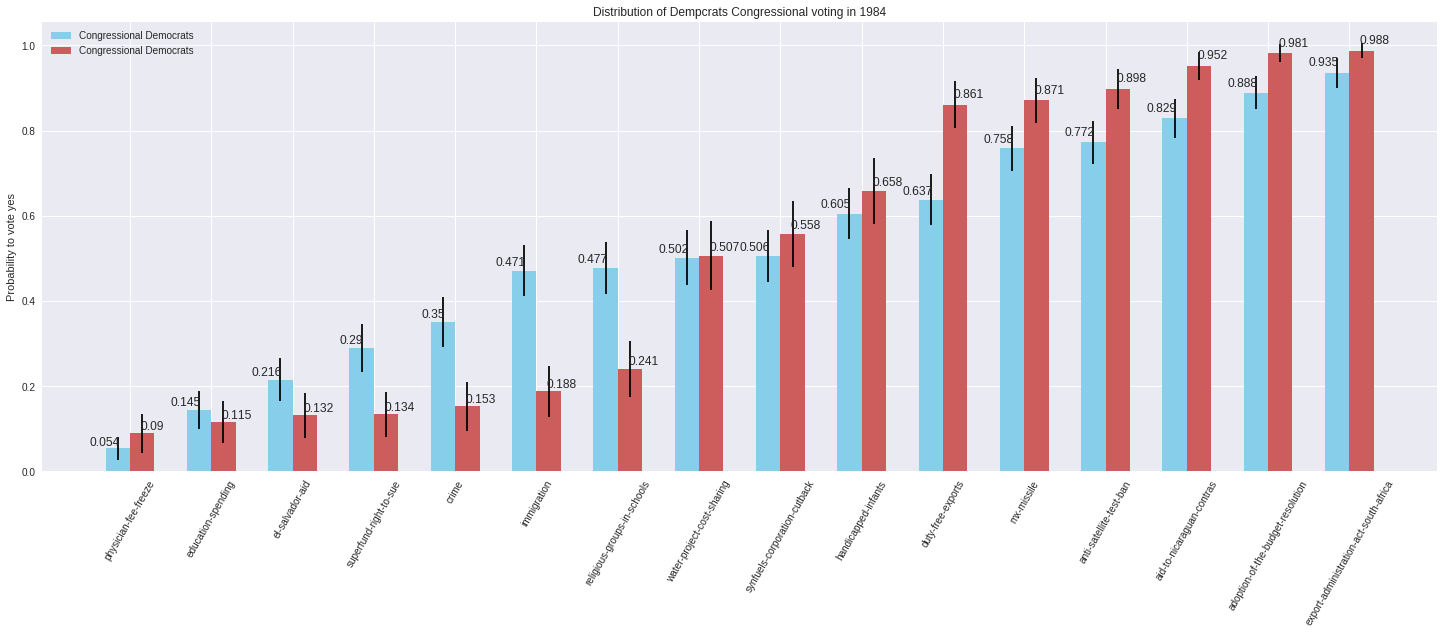

In [232]:

dem_means, dem_std = democrats['mean'], (democrats['upper CI'] - democrats['mean']);
rep_means, rep_std = republicans['mean'], (republicans['upper CI'] - republicans['mean']);

# x locations for the groups
ind = np.arange(len(democrats));
width = 0.3 #width of the bars

# create the plot

fig, ax = plt.subplots(figsize=(25, 8.27));

dem_rects = ax.bar(ind - width/2, dem_means, width, yerr=dem_std,
                   color='SkyBlue', label='Congressional Democrats');
rep_rects = ax.bar(ind + width/2, rep_means, width, yerr=rep_std,
                  color='IndianRed', label='Congressional Democrats' );


# Labeling
ax.set_title('Distribution of Dempcrats Congressional voting in 1984');
ax.set_ylabel('Probability to vote yes');
ax.set_xticks(ind);
ax.set_xticklabels(('physician-fee-freeze', 'education-spending', 'el-salvador-aid', 'superfund-right-to-sue', 'crime', 
                    'immigration', 'religious-groups-in-schools', 'water-project-cost-sharing', 'synfuels-corporation-cutback', 'handicapped-infants', 'duty-free-exports', 'mx-missile', 
                    'anti-satellite-test-ban', 'aid-to-nicaraguan-contras',  'adoption-of-the-budget-resolution', 'export-administration-act-south-africa'));
ax.set_xticklabels(ax.get_xticklabels(), rotation=60);
ax.legend();

def autolabel(rects, xpos='center'):
  '''
  Attach a text label above each bar in *rects*, displaying its height.
  
  *xpos* indicates which side to place the text wrt the center of the 
  bar. It can be {'center', 'right', 'left'}
  '''
  xpos = xpos.lower() #normalize the case of the parameter
  ha = {'center': 'center', 'right' : 'right', 'left' : 'left'}
  offset = {'center' : 0.5 , 'right': 0.57, 'left':0.43} #x_txt = x + w*off
  
  for rect in rects:
    height = rect.get_height().round(3)
    ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
           '{}'.format(height), ha=ha[xpos], va='bottom')

autolabel(dem_rects ,'right')
autolabel(rep_rects ,'left')
  

This graph represents the chance to vote yes on various issues for Democrats and Republicans in the 1984 Congress. The blue bars represent democrats voting yes, the red bars represent republicans voting yes, and the black bars is the 95% confidence interval for the mean per vote.

The confidence interval shows us that the actual population mean of the vote is 95% likely to be within the black bar. 

My understanding is that this means that if we were to take any democrat (or republican) in this congress and have them vote on any of the above issues, they would vote yes with probability equal to a value within the confidence interval 95% of the time. 

This chart shows us that both parties vote in blocks, with a confidence interval less than .2 most of the time (that's a statistically significant satement btw).

it also shows that democrats and republicans most diverge in their yes votes on Superfund (environment), crime, imigration, and religion.

Below is a Barplot of the overall population means.


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


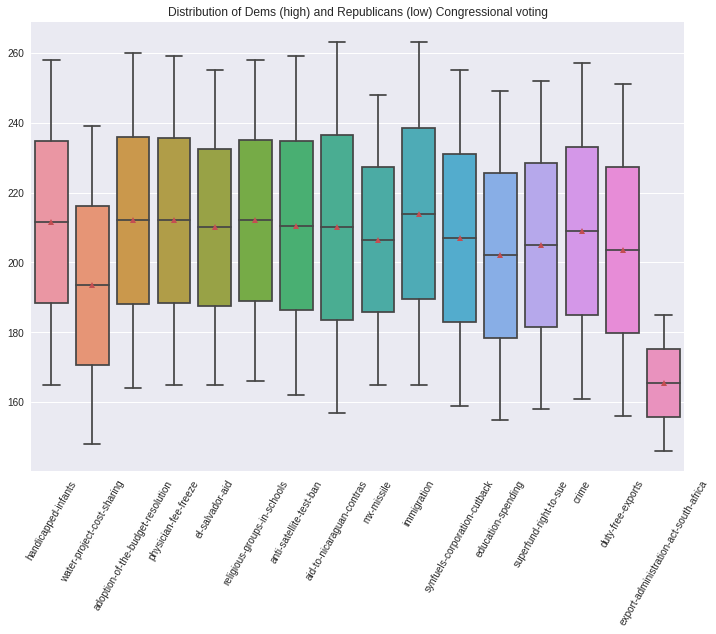

In [234]:
a4_dims = (11.7, 8.27);

fig, ax = plt.subplots(figsize=a4_dims);

ax = sns.boxplot(data=data_count, notch=False, showmeans=True);

ax.set_xticklabels(ax.get_xticklabels(), rotation=60);

plt.title('Distribution of Dems (high) and Republicans (low) Congressional voting', loc='center');



This chark shows the mean or P of each yes vote, with the democratic mean at the top black bar and the republican mean at the bottom black bar.

This chart really illustrates that the democrats had the majority in this congress so they take the top bar on every vote. However, the power of means is that the republicans voting brings the population average down significanty.

I think this chart helps show the power of a minority faction in a legislature. When they vote together, they produce a statistically significant influence on the mean of the population.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)